# Natural_Language_Processing_Deep_Learning( Text classification)

**Dataset :**  https://www.kaggle.com/competitions/nlp-getting-started

**Competition Description**

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies


The author explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a quick tutorial to get you up and running.

Disclaimer: The dataset for this competition contains text that may be considered profane, vulgar, or offensive.

Acknowledgments
This dataset was created by the company figure-eight and originally shared on their ‘Data For Everyone’ website here.

Tweet source: https://twitter.com/AnyOtherAnnaK/status/629195955506708480

* **Model 0**: Naive Bayes (baseline)
* **Model 1**: Feed-forward neural network (dense model)
* **Model 2**: LSTM model
* **Model 3**: GRU model
* **Model 4**: Bidirectional-LSTM model
* **Model 5**: 1D Convolutional Neural Network
* **Model 6**: LSTM and GRU Stack model
* **Model 7**: TensorFlow Hub Pretrained Feature Extractor

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Making data Frame from test Data.
test_data = pd.read_csv('test.csv',index_col=False)
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [3]:
# Making Data Frame from Train Data.
train_data = pd.read_csv('train.csv',index_col=False)
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# Checking Total Number of sample
print(f'Number of Train Data: {len(train_data)}')
print(f'Number of Test Data: {len(test_data)}')
print(f'Total Number of Dataset: {len(train_data)+len(test_data)}')

Number of Train Data: 7613
Number of Test Data: 3263
Total Number of Dataset: 10876


In [5]:
# Suffle training data
train_data_shuffle = train_data.sample(frac=1,random_state=42)
train_data_shuffle


,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [6]:
# How many examples of each class?
train_data_shuffle['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

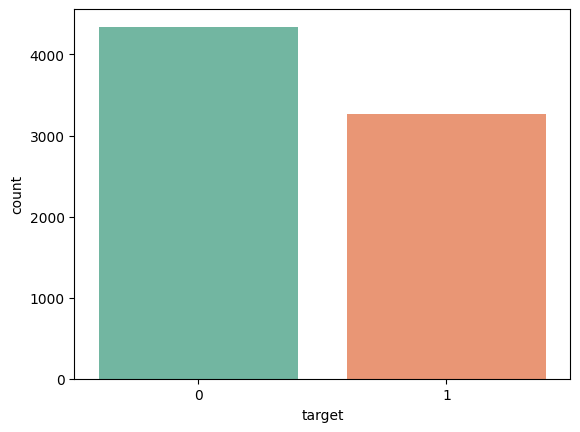

In [7]:
# Graph of counts of 1 and 0.
sns.countplot(data=train_data_shuffle,x='target',palette='Set2');

In [8]:
# Cheking Random Data from Train Dataset
import random
random_index = random.randint(0,len(train_data)-5)
for row in train_data_shuffle[['text','target']][random_index:random_index+5].itertuples():
    no,text,target = row
    print(no,': \n')
    print(f'Target : {target} ' ,' (Not a real Disaster)' if target < 1 else ' (Real Disaster)')
    print(f'\n Text : {text}\n')
    print('-----------------\n')


2210 : 

Target : 0   (Not a real Disaster)

 Text : China is only delaying the deluge: If the fundamentals of an economy do not support the valuations of a stock ... http://t.co/fwIkyUrC18

-----------------

2476 : 

Target : 1   (Real Disaster)

 Text : Helping Hand: In Mumbai 2 TTEs take charge of helpline to calm anxious relatives - The Indian Exp... http://t.co/B9KUylcxg4 MumbaiTimes

-----------------

4965 : 

Target : 0   (Not a real Disaster)

 Text : http://t.co/HFqlwo1kMy E-Mini SP 500: Earnings letdown equals market meltdown! http://t.co/LEi9dWVllq #Amazon

-----------------

807 : 

Target : 0   (Not a real Disaster)

 Text : @anellatulip there is a theory that makes way too much sense that says that the dwarves may be the actual origin of the blight

-----------------

2045 : 

Target : 0   (Not a real Disaster)

 Text : @RemainOnTop #FETTILOOTCH IS #SLANGLUCCI OPPRESSIONS GREATEST DANGER COMING SOON THE ALBUM 
https://t.co/moLL5vd8yD

-----------------



In [9]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences_,val_sentences,train_labels,val_labels = train_test_split(train_data_shuffle['text'],
                                                                         train_data_shuffle['target'].to_numpy(),
                                                                         test_size=0.1, # Making 10% test train split
                                                                         random_state=42 # Random state
                                                                        )

In [10]:
# Train Test Split Numbers
len(train_sentences_),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [11]:
# View the first 10 training sentences and their labels
train_sentences_.iloc[:5]

5921    @mogacola @zamtriossu i screamed after hitting...
3904              Imagine getting flattened by Kurt Zouma
2804    @Gurmeetramrahim #MSGDoing111WelfareWorks Gree...
3718    @shakjn @C7 @Magnums im shaking in fear he's g...
1667    Somehow find you and I collide http://t.co/Ee8...
Name: text, dtype: object

In [12]:
val_sentences.iloc[:5]

4955    DFR EP016 Monthly Meltdown - On Dnbheaven 2015...
584     FedEx no longer to transport bioterror germs i...
7411    Gunmen kill four in El Salvador bus attack: Su...
5950    @camilacabello97 Internally and externally scr...
5541    Radiation emergency #preparedness starts with ...
Name: text, dtype: object

In [13]:
train_labels[:5],val_labels[:5]

(array([0, 0, 1, 0, 0], dtype=int64), array([0, 0, 1, 1, 1], dtype=int64))

In [14]:
# How long is each sentence on average?
train_sentences = train_data_shuffle['text'].to_numpy()
sentences_len =[len(sentences.split()) for sentences in train_sentences]
avg_sentences_len = np.mean(sentences_len)
avg_sentences_len

14.903585971364771

In [15]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

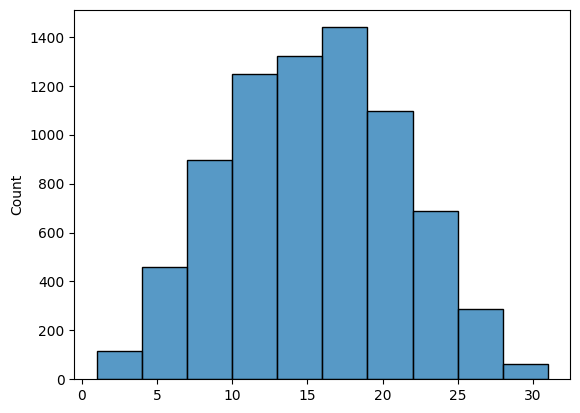

In [16]:
# What's the distribution look like?
sns.histplot(x=sentences_len,bins=10);

In [17]:
# Maximum lenth of sentence 
max(sentences_len)

31

In [18]:
# How long of a sentence covers 98% of the lengths?
np.percentile(sentences_len,98)

26.0

### Text vectorization (tokenization)

In [19]:
# text Vectorization
max_vocab_length =10000
max_length=26


text_vectorization = tf.keras.layers.TextVectorization(max_tokens=max_vocab_length,# how many words in the vocabulary 
                                                       standardize='lower_and_strip_punctuation', # how to process text
                                                       split='whitespace', # how to split tokens
                                                       output_mode='int', # how to map tokens to numbers
                                                       output_sequence_length=max_length # how long should the output sequence of tokens be?
                                                       )

In [20]:
# Fit the train sentences to the text vectorization
text_vectorization.adapt(train_sentences)

In [21]:
# Create sample and tokenize it
sample_sentance = "there's a flood in my street"
text_vectorization([sample_sentance])

<tf.Tensor: shape=(1, 26), dtype=int64, numpy=
array([[278,   3, 216,   4,  13, 712,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)>

In [22]:
# Choose a random sentence from the training dataset and tokenize it
sentance = random.choice(train_sentences)
print(f"Random Sentence:\n\n {sentance}\n\n Vectorized Version:\n")
text_vectorization(sentance)

Random Sentence:

 ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

 Vectorized Version:



<tf.Tensor: shape=(26,), dtype=int64, numpy=
array([ 305, 3687,   84,   98,    1,  665,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int64)>

In [23]:
# Get unique Words in the vocabulary
words_in_vac= text_vectorization.get_vocabulary()
top_5_words= words_in_vac[:5]
bottom_5_words= words_in_vac[-5:]
print(f"Total Numbers of Vocabulary : {len(words_in_vac)}")
print(f"Top 5 Most Common Vocabulary : {top_5_words}")
print(f"Bottom 5 Most Common Vacabulary : {bottom_5_words}")

Total Numbers of Vocabulary : 10000
Top 5 Most Common Vocabulary : ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 Most Common Vacabulary : ['ratio', 'ratingscategories', 'ratings', 'ratingbut', 'rascal']


In [24]:
# Get the config of our text vectorizer
text_vectorization.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 10000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 26,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8'}

### Creating an Embedding using an Embedding Layer


In [25]:
tf.random.set_seed(42)
embedding =tf.keras.layers.Embedding(input_dim=max_vocab_length,# set input shape
                                     output_dim=128,# set size of embedding vector
                                     embeddings_initializer='uniform',# default, intialize randomly
                                     input_length=max_length, # how long is each input
                                     name="embedding_1"
)
embedding

In [26]:
# Get Random setneces from Train sentance
import random
random_sentence = random.choice(train_sentences)
print(f"Text: \n\n{random_sentence}\
        \n\nEmbedded Version:\n")

# Embed the random sentence (turn it into numerical representation)
embedded_sentence = embedding(text_vectorization([random_sentence]))
print(embedded_sentence)

# Text Vectorization 
print(f"\n\nTex Vectorization : {text_vectorization([random_sentence])}")

Text: 

Jewish leaders prayed at the hospital where a Palestinian family is being treated after arson http://t.co/Wf8iTK2KVx via @HuffPostRelig        

Embedded Version:

tf.Tensor(
[[[ 0.03985434 -0.02218541  0.02191751 ... -0.03057658  0.03581448
    0.02640966]
  [ 0.02642084 -0.01849477 -0.0176452  ...  0.01908604  0.03838671
    0.0460853 ]
  [ 0.01485456  0.02778094  0.02186975 ...  0.04113085  0.00808791
    0.02036685]
  ...
  [-0.04913935 -0.04082878  0.00785132 ... -0.0384876  -0.01451185
   -0.02694376]
  [-0.04913935 -0.04082878  0.00785132 ... -0.0384876  -0.01451185
   -0.02694376]
  [-0.04913935 -0.04082878  0.00785132 ... -0.0384876  -0.01451185
   -0.02694376]]], shape=(1, 26, 128), dtype=float32)


Tex Vectorization : [[2620 3145    1   17    2 1521  206    3 1386  295    9  123 4716   38
   586    1   51    1    0    0    0    0    0    0    0    0]]


In [27]:
# Check out a single token's embedding
embedded_sentence[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.03985434, -0.02218541,  0.02191751,  0.02881888,  0.00108942,
        0.01980659, -0.04248867, -0.04949386,  0.03404692, -0.0468381 ,
       -0.04388836,  0.01837224, -0.00194151, -0.00749554, -0.00630511,
        0.0497728 ,  0.04312208,  0.03795207, -0.01041889,  0.04167091,
       -0.00161629,  0.00203558,  0.00017532,  0.01224036,  0.01264924,
        0.01158537,  0.01021212,  0.00386389, -0.01847546, -0.01454198,
        0.01220194, -0.03073032, -0.04561539, -0.04009677, -0.04559441,
        0.02730199, -0.00841254,  0.02705305,  0.02085619,  0.04069625,
       -0.02254361,  0.04797274,  0.00587829, -0.03341539,  0.0324419 ,
        0.00339539,  0.00916915,  0.04205198, -0.04833841,  0.04997555,
        0.03375756,  0.04716107,  0.04425705,  0.00928613,  0.03810989,
       -0.04115389, -0.00792243,  0.03083758,  0.03764094, -0.02589147,
        0.00145332, -0.04164935, -0.04403071,  0.00873034,  0.04793717,
       -0.029847

## Modelling a text dataset

More specifically, we'll be building the following:
* **Model 0**: Naive Bayes (baseline)
* **Model 1**: Feed-forward neural network (dense model)
* **Model 2**: LSTM model
* **Model 3**: GRU model
* **Model 4**: Bidirectional-LSTM model
* **Model 5**: 1D Convolutional Neural Network
* **Model 6**: LSTM and GRU Stack model
* **Model 7**: TensorFlow Hub Pretrained Feature Extractor

Model 0 is the simplest to acquire a baseline which we'll expect each other of the other deeper models to beat.

Each experiment will go through the following steps:
* Construct the model
* Train the model
* Make predictions with the model
* Track prediction evaluation metrics for later comparison


### Model 0: Getting a baseline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])

model_0.fit(train_sentences_,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
# Let's evaluate our model and find our baseline metric
baseline_score=model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves Accuracy of :{baseline_score*100:.2f}%")

Our baseline model achieves Accuracy of :79.27%


In [30]:
# Make predictions
baseline_preds= model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [31]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true,y_pred):
    """
      Calculates model accuracy, precision, recall and f1 score of a binary classification model.

      Args:
      -----
      y_true = true labels in the form of a 1D array
      y_pred = predicted labels in the form of a 1D array

      Returns a dictionary of accuracy, precision, recall, f1-score.
    """
    model_accuracy = accuracy_score(y_true,y_pred)
    model_precision,model_recall,model_f1_score,_=precision_recall_fscore_support(y_true,y_pred,average='weighted')
    
    return {
        'Accuracy': model_accuracy,
        'Precision': model_precision,
        'Recall': model_recall,
        'F1_Score':model_f1_score
    }
    

In [32]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'Accuracy': 0.7926509186351706,
 'Precision': 0.8111390004213173,
 'Recall': 0.7926509186351706,
 'F1_Score': 0.7862189758049549}

### Model 1: A simple dense model

In [33]:
# Build model with the Functional API
inputs = tf.keras.layers.Input(shape=(1,),dtype='string') # inputs are 1-dimensional strings
x = text_vectorization(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = tf.keras.layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense") # construct the model


In [34]:
# Compile
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy']
)

In [35]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 26)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 26, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [36]:
# Fit Model
model_1_history = model_1.fit(train_sentences_,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels)
                             )

Epoch 1/5
215/215 [==============================] - 5s 21ms/step - loss: 0.6360 - accuracy: 0.6335 - val_loss: 0.5801 - val_accuracy: 0.7402
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4870 - accuracy: 0.8095 - val_loss: 0.4909 - val_accuracy: 0.7940
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3860 - accuracy: 0.8447 - val_loss: 0.4659 - val_accuracy: 0.8005
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3241 - accuracy: 0.8758 - val_loss: 0.4636 - val_accuracy: 0.7953
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.2770 - accuracy: 0.8946 - val_loss: 0.4671 - val_accuracy: 0.8045


In [37]:
# Check Result
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.8045


[0.4670925736427307, 0.8044619560241699]

In [38]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.06314764, -0.05107242, -0.00371442, ..., -0.02510721,
         -0.02661886, -0.03916049],
        [ 0.00790768,  0.02499817,  0.01918732, ...,  0.04677424,
          0.00362096,  0.01518988],
        [-0.04304459,  0.00032974,  0.00143546, ..., -0.00180807,
         -0.0069281 , -0.01034243],
        ...,
        [-0.02293282, -0.0882984 , -0.05276566, ...,  0.09632993,
         -0.06180006, -0.09794832],
        [-0.04139108, -0.07909486, -0.07125594, ...,  0.04522539,
         -0.10403434, -0.07945165],
        [-0.01722379, -0.06425311, -0.03726859, ...,  0.04574953,
         -0.10267149, -0.10460084]], dtype=float32)>]

In [39]:
embed_weights= model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [40]:
# Chekeing Model_1 Probability Prediction
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.36045647],
       [0.7260126 ],
       [0.99568826],
       [0.13915579],
       [0.44170788],
       [0.89599836],
       [0.91285664],
       [0.9899103 ],
       [0.91358346],
       [0.24678755]], dtype=float32)

In [41]:
# cheke Model_1 Prediction
model_1_preds= tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [42]:
# Calculate Model_1 Metrics
model_1_results= calculate_results(y_true=val_labels,
                                   y_pred=model_1_preds)
model_1_results

{'Accuracy': 0.8044619422572179,
 'Precision': 0.8113751421678678,
 'Recall': 0.8044619422572179,
 'F1_Score': 0.8013667754454019}

In [43]:
np.array(list(model_1_results))> np.array(list(baseline_results))

array([False, False, False, False])

In [44]:
for key, value in baseline_results.items():
    print(key,value)

Accuracy 0.7926509186351706
Precision 0.8111390004213173
Recall 0.7926509186351706
F1_Score 0.7862189758049549


In [45]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_model(baseline_results,model_new_result):
    for key, value in baseline_results.items():
        print(f"Baseline: {key}: {value:.2f}, New: {key}:{model_new_result[key]:.2f},Difference : {model_new_result[key]-value}")
        
compare_baseline_to_new_model(baseline_results=baseline_results,
                              model_new_result=model_1_results)


Baseline: Accuracy: 0.79, New: Accuracy:0.80,Difference : 0.011811023622047334
Baseline: Precision: 0.81, New: Precision:0.81,Difference : 0.00023614174655051112
Baseline: Recall: 0.79, New: Recall:0.80,Difference : 0.011811023622047334
Baseline: F1_Score: 0.79, New: F1_Score:0.80,Difference : 0.01514779964044699


### Model 2: LSTM

We're going to start with an LSTM-powered RNN.

In [46]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)

# Set random seed and create embedding layer (new embedding layer for each model)
model_2_embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                              output_dim=128,
                                              input_length=max_length,
                                              embeddings_initializer='uniform',
                                              name='embading_layer_2'
                                             )
# Create LSTM model
inputs= tf.keras.layers.Input(shape=(1,),dtype='string')
x = text_vectorization(inputs)
x = model_2_embedding(x)
print(x.shape)
x = tf.keras.layers.LSTM(64)(x)
print(x.shape)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs,outputs,name='Model_2_LSTM')

(None, 26, 128)
(None, 64)


In [47]:
# Compile 
model_2.compile(loss = tf.keras.losses.binary_crossentropy,
               optimizer= tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [48]:
model_2.summary()

Model: "Model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 26)               0         
 torization)                                                     
                                                                 
 embading_layer_2 (Embedding  (None, 26, 128)          1280000   
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
No

In [49]:
# Fit model_2_LSTM
model_2_history = model_2.fit(train_sentences_,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels)
                             )

Epoch 1/5
215/215 [==============================] - 11s 35ms/step - loss: 0.5171 - accuracy: 0.7415 - val_loss: 0.4471 - val_accuracy: 0.7913
Epoch 2/5
215/215 [==============================] - 7s 32ms/step - loss: 0.3265 - accuracy: 0.8699 - val_loss: 0.4973 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 6s 30ms/step - loss: 0.2309 - accuracy: 0.9171 - val_loss: 0.5425 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1696 - accuracy: 0.9431 - val_loss: 0.6385 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1235 - accuracy: 0.9559 - val_loss: 0.8920 - val_accuracy: 0.7572


In [50]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.99287415],
       [0.7442581 ],
       [0.99724245],
       [0.00581938],
       [0.01895161],
       [0.9970265 ],
       [0.9780667 ],
       [0.9972836 ],
       [0.99700326],
       [0.4533666 ]], dtype=float32)

In [51]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(np.round(model_1_pred_probs))
model_2_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [52]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                  y_pred=model_2_preds)
model_2_results

{'Accuracy': 0.8044619422572179,
 'Precision': 0.8113751421678678,
 'Recall': 0.8044619422572179,
 'F1_Score': 0.8013667754454019}

In [53]:
# Compare model 2 to baseline
compare_baseline_to_new_model(baseline_results=baseline_results,model_new_result=model_2_results)

Baseline: Accuracy: 0.79, New: Accuracy:0.80,Difference : 0.011811023622047334
Baseline: Precision: 0.81, New: Precision:0.81,Difference : 0.00023614174655051112
Baseline: Recall: 0.79, New: Recall:0.80,Difference : 0.011811023622047334
Baseline: F1_Score: 0.79, New: F1_Score:0.80,Difference : 0.01514779964044699


### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [54]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)

# Model_3 Embedding 
model_3_embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                              output_dim=128,
                                              embeddings_initializer='uniform',
                                              input_length=max_length,
                                              name='Model_3_GRU_embedding'
                                             )

# Model3 Construction
inputs = tf.keras.layers.Input(shape=(1,),dtype='string')
x = text_vectorization(inputs)
print(x.shape)
x = model_3_embedding(x)
print(x.shape)
x = tf.keras.layers.GRU(64)(x)
print(x.shape)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs,outputs,name='Model_3_GRU')


(None, 26)
(None, 26, 128)
(None, 64)


In [55]:
# Compile The Model_3
model_3.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy']
               )

In [56]:
model_3.summary()

Model: "Model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 26)               0         
 torization)                                                     
                                                                 
 Model_3_GRU_embedding (Embe  (None, 26, 128)          1280000   
 dding)                                                          
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non

In [57]:
# Fit the Model_3 GRU
model_3_history = model_3.fit(train_sentences_,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels)
)

Epoch 1/5
215/215 [==============================] - 10s 30ms/step - loss: 0.6513 - accuracy: 0.6123 - val_loss: 0.5203 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.4076 - accuracy: 0.8276 - val_loss: 0.4661 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.2764 - accuracy: 0.8940 - val_loss: 0.4868 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 7s 33ms/step - loss: 0.1997 - accuracy: 0.9266 - val_loss: 0.5735 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 7s 30ms/step - loss: 0.1421 - accuracy: 0.9514 - val_loss: 0.6364 - val_accuracy: 0.7756


In [58]:
# Model_3 probability posibility
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[0.29362062],
       [0.8950698 ],
       [0.99712175],
       [0.04526723],
       [0.70771253],
       [0.99608374],
       [0.9316748 ],
       [0.9972351 ],
       [0.9932806 ],
       [0.45956382]], dtype=float32)

In [59]:
# Model_3 prediction
model_3_preds= tf.round(tf.squeeze(model_3_pred_probs))
model_3_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [60]:
# Calculate GRU Results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds
                                   )
model_3_results

{'Accuracy': 0.7755905511811023,
 'Precision': 0.7759863909628747,
 'Recall': 0.7755905511811023,
 'F1_Score': 0.7743062301518678}

In [61]:
# Compare Model_3 to baseline
compare_baseline_to_new_model(baseline_results=baseline_results,
                              model_new_result=model_3_results
                             )

Baseline: Accuracy: 0.79, New: Accuracy:0.78,Difference : -0.017060367454068248
Baseline: Precision: 0.81, New: Precision:0.78,Difference : -0.03515260945844256
Baseline: Recall: 0.79, New: Recall:0.78,Difference : -0.017060367454068248
Baseline: F1_Score: 0.79, New: F1_Score:0.77,Difference : -0.011912745653087087


### Model 4: Bidirectonal RNN model 


In [62]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)

# Embedding Layer for model_4
model_4_embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                              output_dim=128,
                                              input_length=max_length,
                                              embeddings_initializer='uniform',
                                              name= 'model_4_embedding'
                                              )
# Model_4 Structure
inputs = tf.keras.layers.Input(shape=(1,),dtype='string')
x = text_vectorization(inputs)
x = model_4_embedding(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs,outputs,name= 'model_4_RNN_bidirectinal')


In [63]:
# Compile model_4
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy']
               )

In [64]:
# Summary
model_4.summary()

Model: "model_4_RNN_bidirectinal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 26)               0         
 torization)                                                     
                                                                 
 model_4_embedding (Embeddin  (None, 26, 128)          1280000   
 g)                                                              
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                          

In [65]:
# Fit Model_4
model_4_history = model_4.fit(train_sentences_,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels)
                              )

Epoch 1/5
215/215 [==============================] - 12s 39ms/step - loss: 0.5107 - accuracy: 0.7454 - val_loss: 0.4501 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 8s 36ms/step - loss: 0.3158 - accuracy: 0.8694 - val_loss: 0.4969 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.2161 - accuracy: 0.9210 - val_loss: 0.5417 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 8s 35ms/step - loss: 0.1520 - accuracy: 0.9438 - val_loss: 0.7106 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 8s 39ms/step - loss: 0.1031 - accuracy: 0.9594 - val_loss: 0.7845 - val_accuracy: 0.7480


In [66]:
# Model_4 prediction Probability
model_4_preds_prob = model_4.predict(val_sentences)
model_4_preds_prob[:10]

24/24 [==============================] - 1s 11ms/step


array([[0.9841653 ],
       [0.32376212],
       [0.99868786],
       [0.09082235],
       [0.4070695 ],
       [0.998198  ],
       [0.84082526],
       [0.99924636],
       [0.9975951 ],
       [0.43890256]], dtype=float32)

In [67]:
# Model_4 Probability
model_4_preds= tf.round(tf.squeeze(model_4_preds_prob))
model_4_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [68]:
# Model_4 Results 
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds
                                   ) 
model_4_results

{'Accuracy': 0.7480314960629921,
 'Precision': 0.7476243671645544,
 'Recall': 0.7480314960629921,
 'F1_Score': 0.7476983829605197}

In [69]:
compare_baseline_to_new_model(baseline_results=baseline_results,
                             model_new_result=model_4_results)

Baseline: Accuracy: 0.79, New: Accuracy:0.75,Difference : -0.044619422572178435
Baseline: Precision: 0.81, New: Precision:0.75,Difference : -0.06351463325676288
Baseline: Recall: 0.79, New: Recall:0.75,Difference : -0.044619422572178435
Baseline: F1_Score: 0.79, New: F1_Score:0.75,Difference : -0.03852059284443521


### Model 5: Conv1D

Before we build a full 1-dimensional CNN model, let's see a 1-dimensional convolutional layer (also called a **temporal convolution**) in action.

We'll first create an embedding of a sample of text and experiment passing it through a `Conv1D()` layer and `GlobalMaxPool1D()` layer.

In [70]:
embedding_test = embedding(text_vectorization(["this's a test sentence"]))
conv_1d = tf.keras.layers.Conv1D(filters=64,kernel_size=5,activation='relu',padding='same')
conv_1d_output = conv_1d(embedding_test)
max_pool=tf.keras.layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 26, 128]), TensorShape([1, 26, 64]), TensorShape([1, 64]))

In [71]:
# See the outputs of each layer
embedding_test,conv_1d_output,max_pool_output

(<tf.Tensor: shape=(1, 26, 128), dtype=float32, numpy=
 array([[[ 0.00790768,  0.02499817,  0.01918732, ...,  0.04677424,
           0.00362096,  0.01518988],
         [-0.0471019 ,  0.02498078, -0.02130593, ..., -0.00256081,
           0.01376428,  0.03146987],
         [-0.08556374, -0.08301105, -0.1579225 , ...,  0.08011254,
          -0.1578477 , -0.1261908 ],
         ...,
         [-0.06314764, -0.05107242, -0.00371442, ..., -0.02510721,
          -0.02661886, -0.03916049],
         [-0.06314764, -0.05107242, -0.00371442, ..., -0.02510721,
          -0.02661886, -0.03916049],
         [-0.06314764, -0.05107242, -0.00371442, ..., -0.02510721,
          -0.02661886, -0.03916049]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 26, 64), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.00616926, ..., 0.        ,
          0.        , 0.0492143 ],
         [0.        , 0.10247052, 0.04465018, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.12949875, 0.00

In [72]:
# set Random State
tf.random.set_seed(42)

# Model_5 Embedding Layer
model_5_embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                              output_dim=128,
                                              input_length=max_length,
                                               embeddings_initializer='uniform'
                                             ) 
# Model_5 structure 
inputs = tf.keras.layers.Input(shape=(1,),dtype='string')
x = text_vectorization(inputs)
x = model_5_embedding(x)
x = tf.keras.layers.Conv1D(filters=32,kernel_size=5,activation='relu')(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(64,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs,outputs,name='Model_5')

In [73]:
# compile The model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy']
               )

In [74]:
model_5.summary()

Model: "Model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 26)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 26, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 64)                2112

In [75]:
# Model_5 Fit
model_5_history = model_5.fit(train_sentences_,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels)
                             )

Epoch 1/5
215/215 [==============================] - 6s 23ms/step - loss: 0.5396 - accuracy: 0.7254 - val_loss: 0.4589 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3015 - accuracy: 0.8829 - val_loss: 0.5076 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1575 - accuracy: 0.9499 - val_loss: 0.5770 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1053 - accuracy: 0.9692 - val_loss: 0.6234 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0806 - accuracy: 0.9766 - val_loss: 0.6587 - val_accuracy: 0.7795


In [76]:
# Model_5 Prediction Probability
model_5_preds_probs = model_5.predict(val_sentences)
model_5_preds_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.14627191],
       [0.6946108 ],
       [0.99972206],
       [0.02013723],
       [0.13204361],
       [0.9886598 ],
       [0.69006   ],
       [0.9982917 ],
       [0.99794596],
       [0.3717407 ]], dtype=float32)

In [77]:
# Model_5 Preds
model_5_preds = tf.squeeze(tf.round(model_5_preds_probs))
model_5_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [78]:
model_5_results= calculate_results(y_true=val_labels,
                                   y_pred=model_5_preds)
model_5_results

{'Accuracy': 0.7795275590551181,
 'Precision': 0.7859220660173883,
 'Recall': 0.7795275590551181,
 'F1_Score': 0.7757938490040367}

In [79]:
compare_baseline_to_new_model(baseline_results=baseline_results,
                             model_new_result=model_5_results)

Baseline: Accuracy: 0.79, New: Accuracy:0.78,Difference : -0.013123359580052507
Baseline: Precision: 0.81, New: Precision:0.79,Difference : -0.025216934403928914
Baseline: Recall: 0.79, New: Recall:0.78,Difference : -0.013123359580052507
Baseline: F1_Score: 0.79, New: F1_Score:0.78,Difference : -0.010425126800918227


### Model 6: LSTM and GRU Stack model

In [80]:
# Set Random seed
tf.random.set_seed(42)

# Embedding Layer of Model 6
model_6_embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                              output_dim=128,
                                              input_length=max_length,
                                              embeddings_initializer='uniform')

# Model_6 Structure
inputs = tf.keras.layers.Input(shape=(1,),dtype='string')
x = text_vectorization(inputs)
x = model_6_embedding(x)
print(x.shape)
x = tf.keras.layers.LSTM(64,return_sequences=True)(x)
print(x.shape)
x = tf.keras.layers.GRU(64)(x)
print(x.shape)
x = tf.keras.layers.Dense(64,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_6 = tf.keras.Model(inputs,outputs)

(None, 26, 128)
(None, 26, 64)
(None, 64)


In [81]:
# Compile The Model
model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics =['accuracy']
               )

In [82]:
# Summary of model_6
model_6.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 26)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 26, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 26, 64)            49408     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                             

In [83]:
# Fit Model_6 
model_6_history = model_6.fit(train_sentences_,
                              train_labels,
                              epochs = 5,
                              validation_data=(val_sentences,val_labels)
                             )

Epoch 1/5
215/215 [==============================] - 17s 55ms/step - loss: 0.5206 - accuracy: 0.7345 - val_loss: 0.4560 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 9s 43ms/step - loss: 0.3288 - accuracy: 0.8701 - val_loss: 0.5035 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 10s 44ms/step - loss: 0.2271 - accuracy: 0.9188 - val_loss: 0.5454 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 9s 44ms/step - loss: 0.1596 - accuracy: 0.9429 - val_loss: 0.8036 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 9s 43ms/step - loss: 0.1195 - accuracy: 0.9531 - val_loss: 0.8377 - val_accuracy: 0.7612


In [84]:
# Model_6 probability Prediction
model_6_preds_prob = model_6.predict(val_sentences)
model_6_preds_prob[:10]

24/24 [==============================] - 1s 15ms/step


array([[0.908398  ],
       [0.7513985 ],
       [0.99857336],
       [0.03008763],
       [0.24218869],
       [0.9976055 ],
       [0.9740095 ],
       [0.9984323 ],
       [0.9980483 ],
       [0.29378223]], dtype=float32)

In [85]:
# Model_6 prediction
model_6_preds = tf.squeeze(tf.round(model_6_preds_prob))
model_6_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [86]:
# Result od model_6
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds
                                   )
model_6_results

{'Accuracy': 0.7611548556430446,
 'Precision': 0.7617086366916097,
 'Recall': 0.7611548556430446,
 'F1_Score': 0.7594983627881854}

In [87]:
compare_baseline_to_new_model(baseline_results=baseline_results,
                              model_new_result=model_6_results
                             )

Baseline: Accuracy: 0.79, New: Accuracy:0.76,Difference : -0.03149606299212593
Baseline: Precision: 0.81, New: Precision:0.76,Difference : -0.04943036372970755
Baseline: Recall: 0.79, New: Recall:0.76,Difference : -0.03149606299212593
Baseline: F1_Score: 0.79, New: F1_Score:0.76,Difference : -0.026720613016769534


###  Model_7 :TensorFlow Pretrain model

**Universal Sentence Encoder family**
https://tfhub.dev/google/universal-sentence-encoder/4

In [88]:
# We can use this encoding layer in place of our text_vectorizer and embedding layers
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [89]:
# Set Random Seed
tf.random.set_seed(42)

# Structure of model
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
],name='USE')


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [90]:
# Compile Model_7
model_7.compile (  loss = tf.keras.losses.binary_crossentropy,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics =['accuracy'])

In [91]:
# Summary
model_7.summary()

Model: "USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [92]:
model_7_history = model_7.fit(train_sentences_,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences,val_labels)
                             )

Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.5085 - accuracy: 0.7796 - val_loss: 0.4477 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4152 - accuracy: 0.8137 - val_loss: 0.4360 - val_accuracy: 0.8150
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4002 - accuracy: 0.8221 - val_loss: 0.4314 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3927 - accuracy: 0.8254 - val_loss: 0.4270 - val_accuracy: 0.8176
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3863 - accuracy: 0.8279 - val_loss: 0.4286 - val_accuracy: 0.8163


In [93]:
# Model_7 prediction Probability
model_7_preds_prob = model_7.predict(val_sentences)
model_7_preds_prob[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.15830812],
       [0.7337988 ],
       [0.9873357 ],
       [0.19435549],
       [0.7378753 ],
       [0.6853474 ],
       [0.9798622 ],
       [0.976368  ],
       [0.92808354],
       [0.09304346]], dtype=float32)

In [94]:
# Model_7 prediction
model_7_preds = tf.squeeze(tf.round(model_7_preds_prob))
model_7_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0.], dtype=float32)>

In [95]:
# Model_7_ resuts
model_7_results = calculate_results(y_pred=model_7_preds,
                                    y_true=val_labels
                                   )
model_7_results

{'Accuracy': 0.8162729658792651,
 'Precision': 0.8187546712946793,
 'Recall': 0.8162729658792651,
 'F1_Score': 0.8147089025083661}

In [96]:
compare_baseline_to_new_model(baseline_results=baseline_results,
                              model_new_result=model_7_results
                             )

Baseline: Accuracy: 0.79, New: Accuracy:0.82,Difference : 0.023622047244094557
Baseline: Precision: 0.81, New: Precision:0.82,Difference : 0.007615670873362013
Baseline: Recall: 0.79, New: Recall:0.82,Difference : 0.023622047244094557
Baseline: F1_Score: 0.79, New: F1_Score:0.81,Difference : 0.028489926703411217


## Comparing the performance of each of our models

In [97]:
# Combine All Results Using DataFrame
all_Model_results = pd.DataFrame( { 'Baseline': baseline_results,
                                    'Simple_dense': model_1_results,
                                    'LMST': model_2_results,
                                    'GRU': model_3_results,
                                    'Bidirectionall': model_4_results,
                                    'CONV_1D': model_5_results,
                                    'LSTM_AND_GRU':model_6_results,
                                    'Tensorflow_hub_Model_USE':model_7_results
                                   })
all_Model_results = all_Model_results.T
all_Model_results

,Accuracy,Precision,Recall,F1_Score
Baseline,0.792651,0.811139,0.792651,0.786219
Simple_dense,0.804462,0.811375,0.804462,0.801367
LMST,0.804462,0.811375,0.804462,0.801367
GRU,0.775591,0.775986,0.775591,0.774306
Bidirectionall,0.748031,0.747624,0.748031,0.747698
CONV_1D,0.779528,0.785922,0.779528,0.775794
LSTM_AND_GRU,0.761155,0.761709,0.761155,0.759498
Tensorflow_hub_Model_USE,0.816273,0.818755,0.816273,0.814709


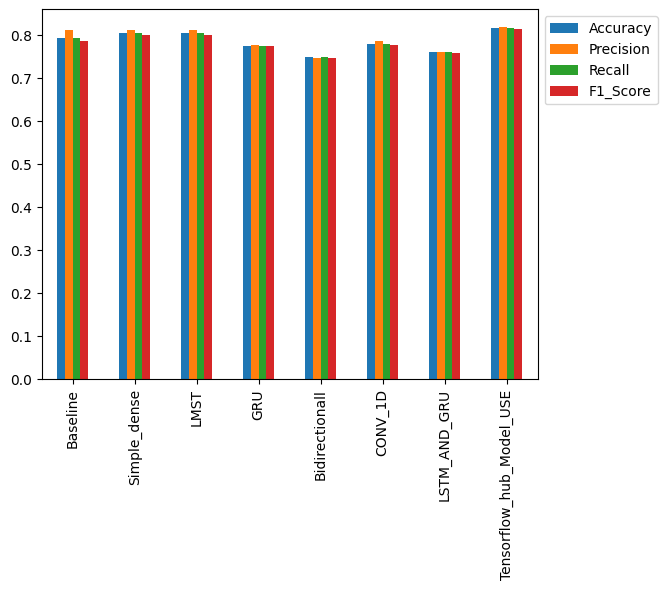

In [98]:
# Plot and compare all of the model results
all_Model_results.plot(kind='bar').legend(bbox_to_anchor=(1.0,1.0));

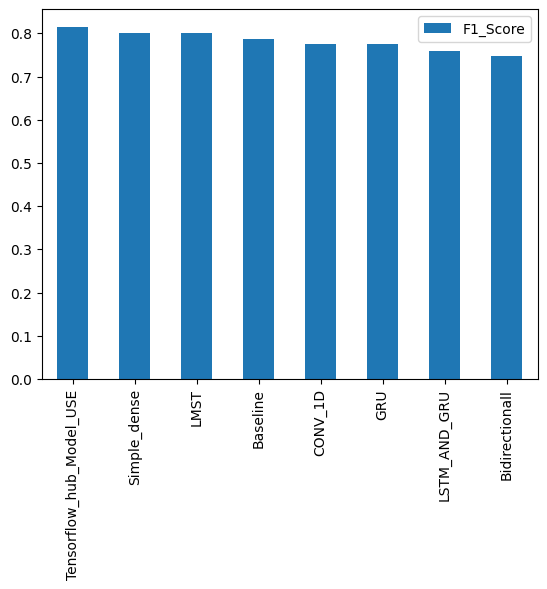

In [99]:
# Sort model results by f1-score
all_Model_results.sort_values('F1_Score',ascending=False)['F1_Score'].plot(kind='bar').legend(bbox_to_anchor=(1.0,1.0));

## Saving and loading a trained model

In [100]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_7.save('Tensorflow_hub_Model_USE')

INFO:tensorflow:Assets written to: Tensorflow_hub_Model_USE\assets


INFO:tensorflow:Assets written to: Tensorflow_hub_Model_USE\assets


In [101]:
# Load TF Hub Sentence Encoder SavedModel
new_model = tf.keras.models.load_model('Tensorflow_hub_Model_USE')

**Checking using Evaluate that Both the models are same**

In [102]:
new_model.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4286 - accuracy: 0.8163


[0.42860379815101624, 0.8162729740142822]

In [103]:
model_7.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 10ms/step - loss: 0.4286 - accuracy: 0.8163


[0.42860379815101624, 0.8162729740142822]

## Finding the most wrong examples

We mentioned before that if many of our modelling experiments are returning similar results, despite using different kinds of models, it's a good idea to return to the data and inspect why this might be.

In [104]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_2_preds,
                       "pred_prob": tf.squeeze(model_7_preds_prob)})
val_df.head()

,text,target,pred,pred_prob
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.158308
584,FedEx no longer to transport bioterror germs i...,0,1.0,0.733799
7411,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.987336
5950,@camilacabello97 Internally and externally scr...,1,0.0,0.194355
5541,Radiation emergency #preparedness starts with ...,1,0.0,0.737875


In [105]:
Val_df_most_wrong = val_df[val_df['target']!=val_df['pred']].sort_values('pred_prob',ascending=False)
Val_df_most_wrong

,text,target,pred,pred_prob
2442,Death on Railway track: Why rains cannot take ...,1,0.0,0.963549
6041,Panoramic Resources cuts jobs after seismic ev...,1,0.0,0.954884
6019,SEISMIC RISK: a COMPARISON between 2 case stud...,1,0.0,0.922516
578,FedEx will no longer transport bioterror patho...,0,1.0,0.855777
4821,@noah_anyname That's where the concentration c...,0,1.0,0.854815
...,...,...,...,...
6221,I get to smoke my shit in peace,1,0.0,0.047074
5464,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.043877
2250,Why are you deluged with low self-image? Take ...,1,0.0,0.040745
1861,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037031


In [106]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in Val_df_most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.06252184510231018
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0, Prob: 0.05903308093547821
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.05679506063461304
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.052146121859550476
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.05113353207707405
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.04707353562116623
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.0438765697

## Making predictions on the test dataset

We do not have labels for the test dataset so we are going to make some predictions and inspect them for ourselves.

Let's write some code to make predictions on random samples from the test dataset and visualize them.

In [107]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [108]:
import random

# Making Prediction on test Data
test_sentences = test_data['text'].to_list()
random_sentences = random.sample(test_sentences,10)
for test_sample in random_sentences:
    preds_prob = tf.squeeze(model_7.predict([test_sample]))
    preds = tf.round(preds_prob)
    print(f"\n\nPrediction : {preds}, Prediction Probability : {preds_prob}")
    print(f"\n\n Text : {test_sample}\n\n")
    print("---")


1/1 [==============================] - 1s 717ms/step


Prediction : 0.0, Prediction Probability : 0.05541255697607994


 Text : What they (dentists) don't tell u is how much ur mouth will be in pain when the numbing wears off because of the puncture wounds in ur gums.


---
1/1 [==============================] - 0s 65ms/step


Prediction : 0.0, Prediction Probability : 0.06997758150100708


 Text : @Robot_Rainstorm I'm interested.  Is it through Yahoo?


---
1/1 [==============================] - 0s 57ms/step


Prediction : 0.0, Prediction Probability : 0.07829422503709793


 Text : Is this the real life? Is this just fantasy? Caught in a landslide. No escape from reality.


---
1/1 [==============================] - 0s 77ms/step


Prediction : 0.0, Prediction Probability : 0.19689695537090302


 Text : georgegallagher: RT WNBA: Stars coach Dan Hughes taken off court on stretcher after collision with Danielle RobinÛ_ http://t.co/wz4xVZYqJd


---
1/1 [==============================] - 

How do our model's predictions look on the test dataset?

It's important to do these kind of visualization checks as often as possible to get a glance of how your model performs on unseen data and subsequently how it might perform on the real test: Tweets from the wild.

## Predicting on Tweets

In [109]:
# Turn Tweet into string
tweet = "take the best choices from others and make your own"

In [110]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict(pd.DataFrame([sentence]))
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [111]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_1, # use the USE model
                    sentence=tweet)

1/1 [==============================] - 0s 70ms/step
Pred: 0.0 (not real disaster) Prob: 0.11195430904626846
Text:
take the best choices from others and make your own


In [112]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_2, # use the USE model
                    sentence=tweet)

1/1 [==============================] - 0s 233ms/step
Pred: 0.0 (not real disaster) Prob: 0.004389057867228985
Text:
take the best choices from others and make your own


In [113]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_3, # use the USE model
                    sentence=tweet)

1/1 [==============================] - 0s 277ms/step
Pred: 0.0 (not real disaster) Prob: 0.01980040967464447
Text:
take the best choices from others and make your own


In [114]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_4, # use the USE model
                    sentence=tweet)

1/1 [==============================] - 0s 341ms/step
Pred: 0.0 (not real disaster) Prob: 0.06521549075841904
Text:
take the best choices from others and make your own


In [115]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_5, # use the USE model
                    sentence=tweet)

1/1 [==============================] - 0s 56ms/step
Pred: 0.0 (not real disaster) Prob: 0.01575511321425438
Text:
take the best choices from others and make your own


In [116]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=tweet)

1/1 [==============================] - 0s 433ms/step
Pred: 0.0 (not real disaster) Prob: 0.0024983875919133425
Text:
take the best choices from others and make your own


In [117]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_7, # use the USE model
                    sentence=tweet)

1/1 [==============================] - 0s 44ms/step
Pred: 0.0 (not real disaster) Prob: 0.07797784358263016
Text:
take the best choices from others and make your own


** *The End*  **
---------------------

--------------------